In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

In [2]:
plt.rcParams['figure.figsize']= (10, 7)

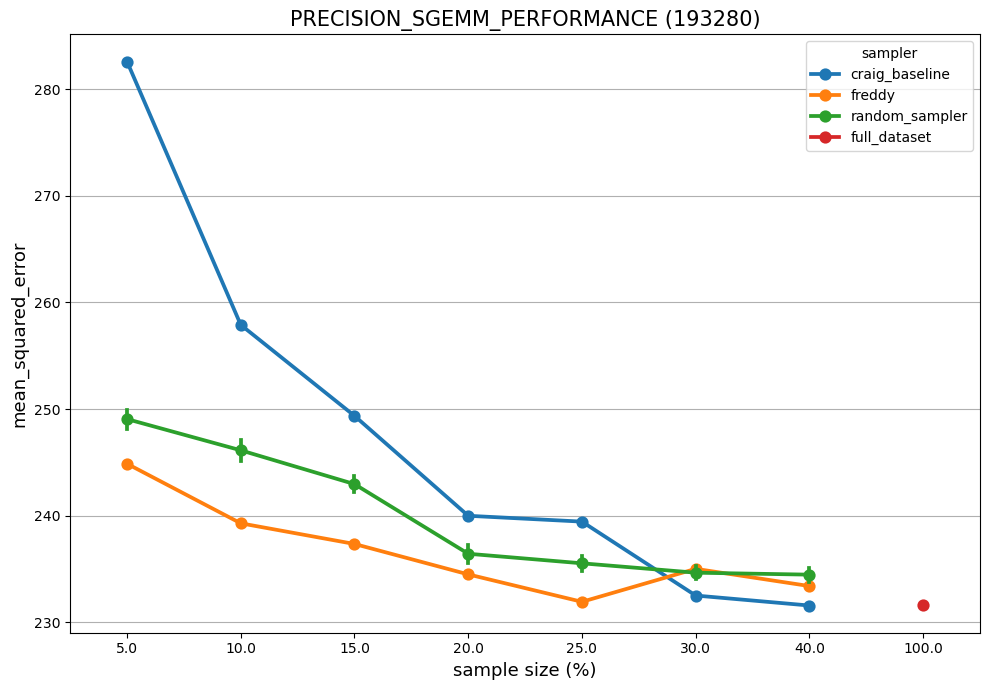

In [3]:
curdir = Path()
files = [*curdir.rglob('precision*.csv')]
file = files[0]
result = pd.read_csv(file)
size = result.sample_size.max()

result['sample_size'] = (result['sample_size'] / result['train_size']).round(2) * 100
result.value = result.value ** .5
result = result[
    (result.metric == 'mean_squared_error') & 
    ~(result.sampler == 'kmeans_sampler')
]
sns.pointplot(data=result, x='sample_size', y='value', hue='sampler', errorbar='sd')
plt.title(f'{file.stem.upper()} ({size})',  fontsize=15)
plt.ylabel(result.metric.unique()[0], fontsize=13)
plt.xlabel('sample size (%)', fontsize=13)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

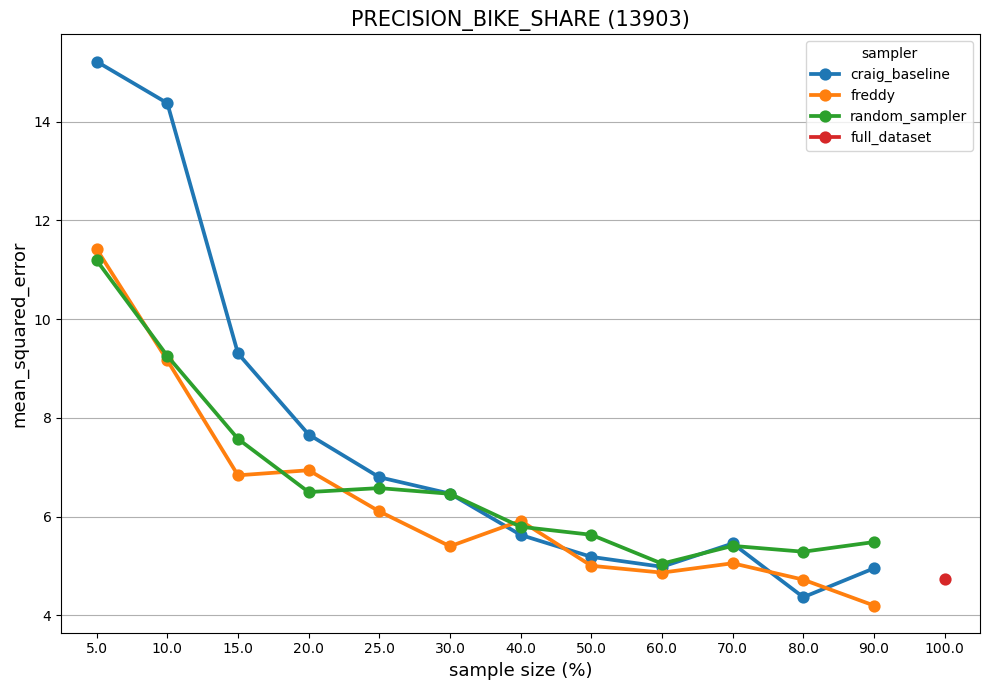

In [19]:
curdir = Path()
files = [*curdir.rglob('precision*.csv')]
file = files[1]

result = pd.read_csv(file)
size = result.sample_size.max()
result['sample_size'] = (result['sample_size'] / result['train_size']).round(2) * 100
# result = result[result.sample_size>4]
result = result[result.sample_size > 1]
result.value = result.value ** .5
sns.pointplot(data=result, x='sample_size', y='value', hue='sampler', errorbar='sd')
plt.title(f'{file.stem.upper()} ({size})',  fontsize=15)
plt.ylabel(result.metric.unique()[0], fontsize=13)
plt.xlabel('sample size (%)', fontsize=13)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

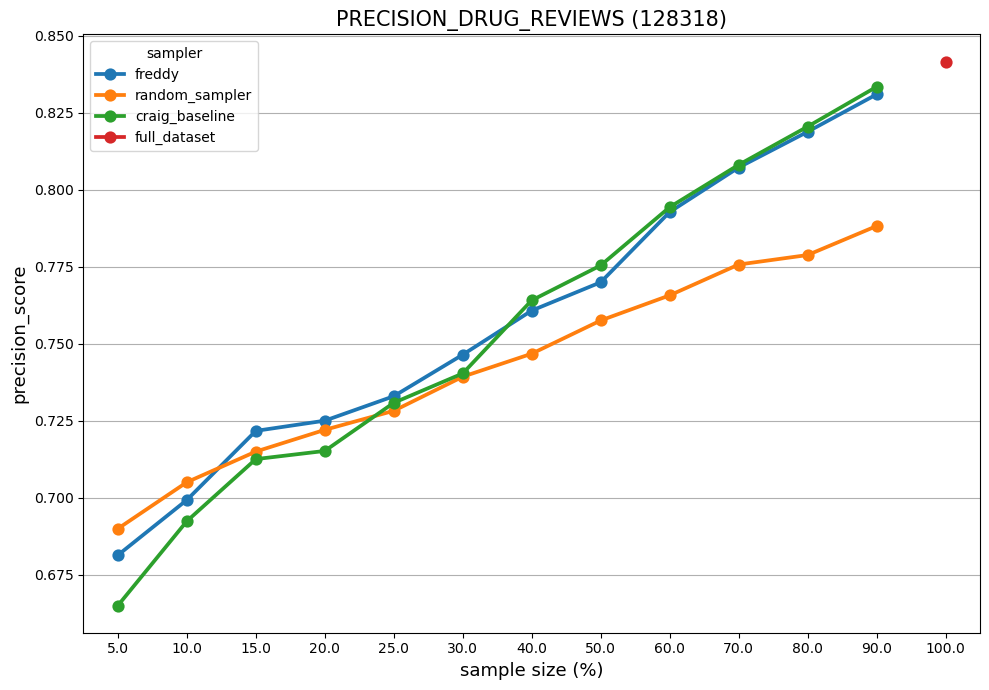

In [21]:
curdir = Path()
files = [*curdir.rglob('precision*.csv')]
file = files[2]

result = pd.read_csv(file)
size = result.sample_size.max()
result['sample_size'] = (result['sample_size'] / result['train_size']).round(2) * 100
# result = result[result.sample_size>4]
result = result[
    (result.metric == 'precision_score') & 
    ~(result.sampler == 'kmeans_sampler')
]
sns.pointplot(data=result, x='sample_size', y='value', hue='sampler', errorbar='sd')
plt.title(f'{file.stem.upper()} ({size})',  fontsize=15)
plt.ylabel(result.metric.unique()[0], fontsize=13)
plt.xlabel('sample size (%)', fontsize=13)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

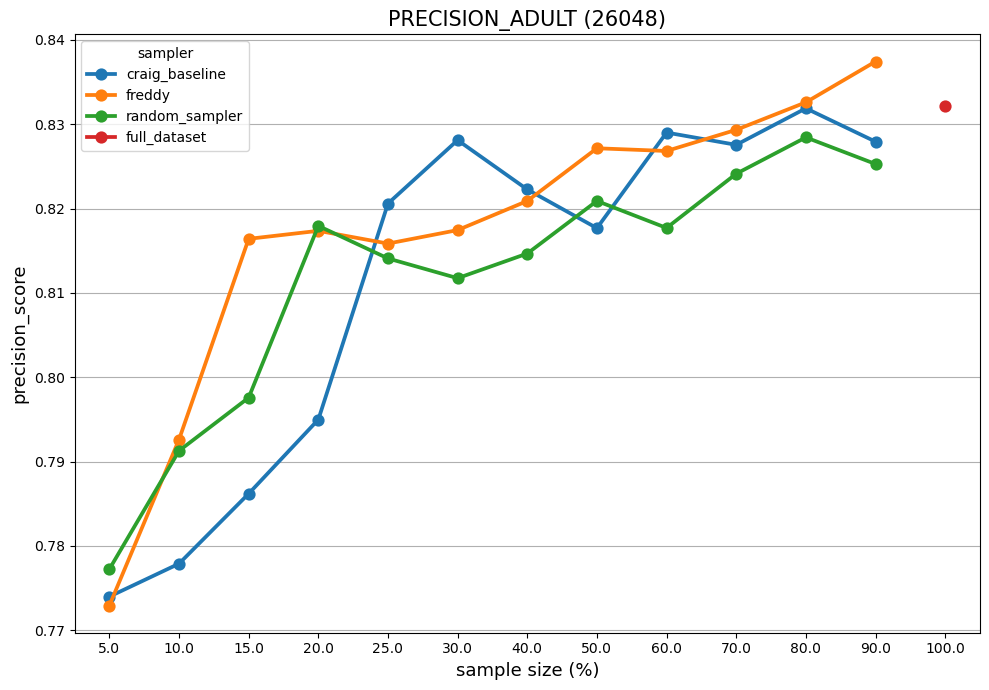

In [20]:
curdir = Path()
files = [*curdir.rglob('precision*.csv')]
file = files[5]

result = pd.read_csv(file)
size = result.sample_size.max()
result['sample_size'] = (result['sample_size'] / result['sample_size'].max()).round(2) * 100
# result['sample_size'] = (result['sample_size'] / result['train_size']).round(0) * 100

# result = result[result.sample_size>4]
result = result[
    (result.metric == 'precision_score') & 
    ~(result.sampler == 'kmeans_sampler')
]
sns.pointplot(data=result, x='sample_size', y='value', hue='sampler', errorbar='sd')
plt.title(f'{file.stem.upper()} ({size})',  fontsize=15)
plt.ylabel(result.metric.unique()[0], fontsize=13)
plt.xlabel('sample size (%)', fontsize=13)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

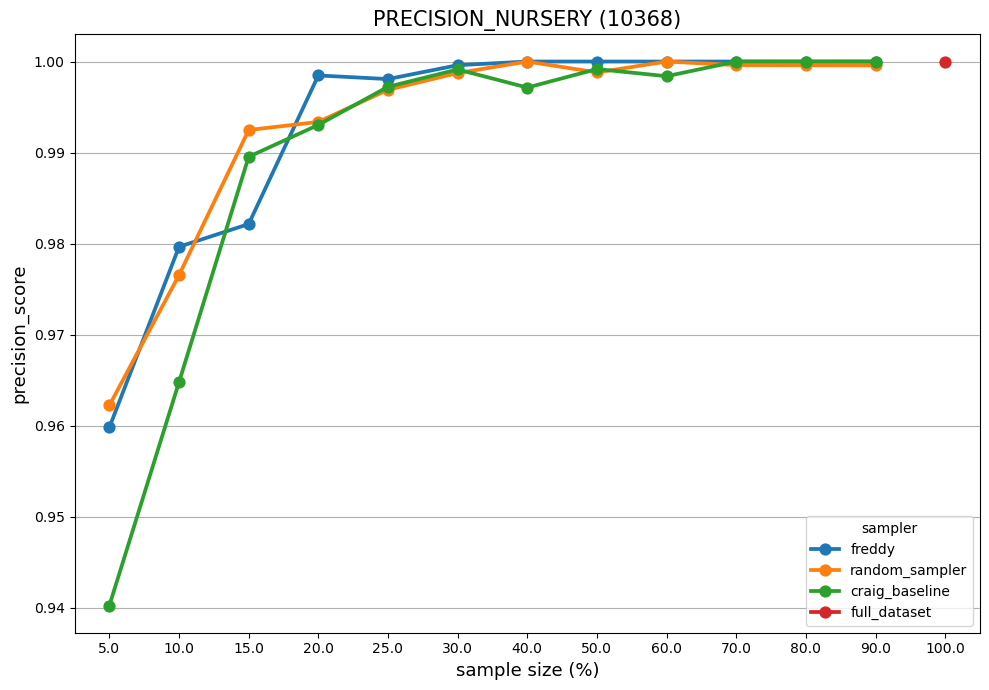

In [18]:
curdir = Path()
files = [*curdir.rglob('precision*.csv')]
file = files[4]

result = pd.read_csv(file)
size = result.sample_size.max()
result['sample_size'] = (result['sample_size'] / result['sample_size'].max()).round(2) * 100
# result['sample_size'] = (result['sample_size'] / result['train_size']).round(0) * 100

# result = result[result.sample_size>4]
result = result[
    (result.metric == 'precision_score') & 
    ~(result.sampler == 'kmeans_sampler')
]
sns.pointplot(data=result, x='sample_size', y='value', hue='sampler', errorbar='sd')
plt.title(f'{file.stem.upper()} ({size})',  fontsize=15)
plt.ylabel(result.metric.unique()[0], fontsize=13)
plt.xlabel('sample size (%)', fontsize=13)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [8]:
result = pd.read_csv('/Users/victor/Documents/projects/coreset/results/mnist/curve_mnist.csv', index_col='Unnamed: 0')
result['elapsed'] = result['elapsed'].astype(int)

fig, ax = plt.subplots(1,2, figsize=(22,6), sharex=True)
fig.suptitle('Train loss x Training time', fontsize=15)

# sns.lineplot(result, x='elapsed', ax=ax[0],y='loss', hue='sampler', style='sampler', errorbar=('sd'), markers=True, err_style='bars', lw=1.8)
sns.pointplot(result, x='elapsed', ax=ax[0],y='val_loss', hue='sampler', errorbar=('sd', .35), lw=1.8, capsize=.1)
ax[0].set_xlabel('TIME (s)', fontsize=13)
ax[0].set_ylabel('Test Logloss', fontsize=13)
ax[0].set_xlim([-.10, 12])

sns.pointplot(result, x='elapsed', ax=ax[1],y='val_accuracy', hue='sampler', errorbar=('sd'), lw=1.8, capsize=.1)
ax[1].set_xlabel('TIME (s)', fontsize=13)
ax[1].set_ylabel('Test Accuracy', fontsize=13)
ax[1].set_ylim([.85, .95])
ax[1].grid(axis='y')
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

In [ ]:
curdir = Path()
files = [*curdir.rglob('b_size*.csv')]

print(files)

name = f'{files[0].stem.upper()}'

fig, axes = plt.subplots(3,1)

result = pd.read_csv(files[0])
result = result.fillna('Full dataset')
result = result[result.sampler != 'random_sampler']
result['sample_size'] = (result['sample_size'] / result['train_size']).round(2) * 100
result['value'] = result['value'] ** .5

for s, ax in zip([10, 25, 40], axes):
    tmp = result[
        (result.sample_size == s) |
        (result.sample_size == 100)
    ]
    # result = result[result.sampler != 'random_sampler']
    sns.pointplot(data=tmp, x='batch_size', y='value', hue='sampler', ax=ax)
    ax.set_title(f'{name} ({s}%)')
    ax.set_ylabel(tmp.metric.unique()[0])
    ax.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
curdir = Path()
files = [*curdir.rglob('b_size*.csv')]

print(files)


name = f'{files[1].stem.upper()}'

fig, axes = plt.subplots(3,1)

result = pd.read_csv(files[1])
result = result[result.metric == 'precision_score']
result = result[result.sampler != 'random_sampler']
result = result.fillna('Full dataset')
result['sample_size'] = (result['sample_size'] / result['train_size']).round(2) * 100

for s, ax in zip([10, 25, 40], axes):
    tmp = result[
        (result.sample_size == s) |
        (result.sample_size == 100)
    ]
    # result = result[result.sampler != 'random_sampler']
    sns.pointplot(data=tmp, x='batch_size', y='value', hue='sampler', ax=ax, errorbar='sd')
    ax.set_title(f'{name} ({s}%)')
    ax.set_ylabel(tmp.metric.unique()[0])
    ax.grid(axis='y')
plt.tight_layout()
plt.show()